Working With Iris Dataset For analysing KNN model

In [2]:
#importing libraries
import numpy as np # linear algebra
import pandas as pd # plying with dataframe
import matplotlib.pyplot as plt
import operator
import seaborn as sns

In [3]:
data=pd.read_csv("iris.csv")
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print(data.info())
print(data['Name'].unique())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLength    150 non-null float64
SepalWidth     150 non-null float64
PetalLength    150 non-null float64
PetalWidth     150 non-null float64
Name           150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB
None
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
       SepalLength  SepalWidth  PetalLength  PetalWidth
count   150.000000  150.000000   150.000000  150.000000
mean      5.843333    3.054000     3.758667    1.198667
std       0.828066    0.433594     1.764420    0.763161
min       4.300000    2.000000     1.000000    0.100000
25%       5.100000    2.800000     1.600000    0.300000
50%       5.800000    3.000000     4.350000    1.300000
75%       6.400000    3.300000     5.100000    1.800000
max       7.900000    4.400000     6.900000    2.500000


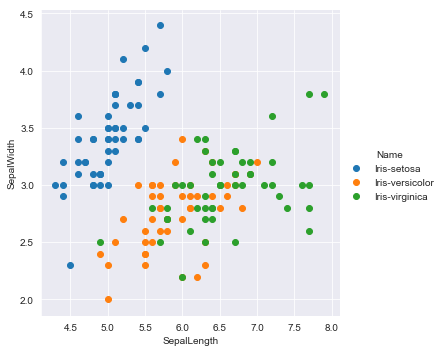

In [4]:
sns.set_style("darkgrid")
sns.FacetGrid(data,hue='Name',height=5)\
    .map(plt.scatter,"SepalLength","SepalWidth")\
    .add_legend()
plt.show()

C:\Users\Krish\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


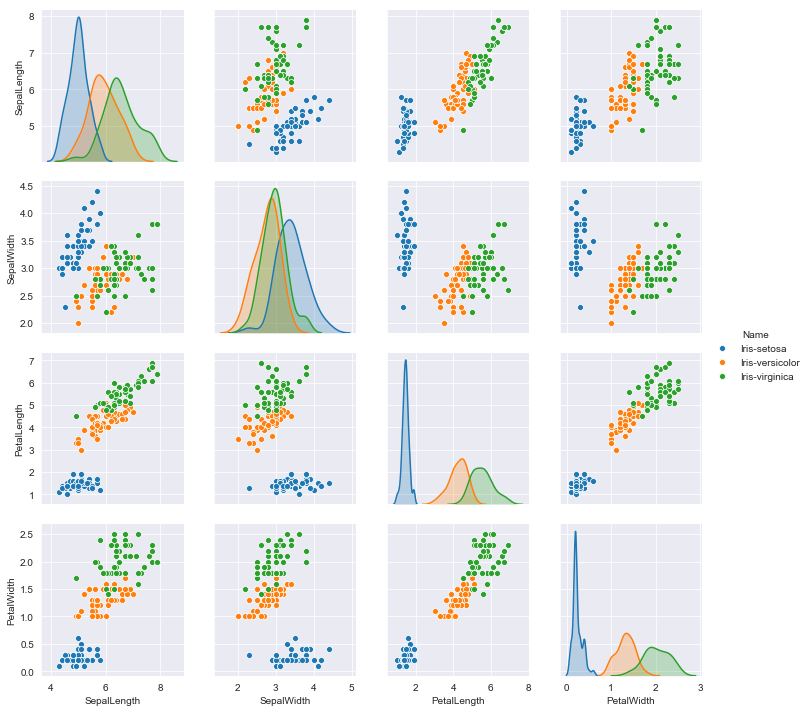

In [14]:
sns.set_style("darkgrid")
sns.pairplot(data,hue="Name",kind="scatter")
plt.show()

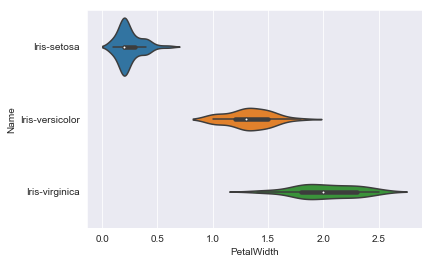

In [15]:
sns.violinplot(y="Name",x="PetalWidth",data=data)
plt.show()

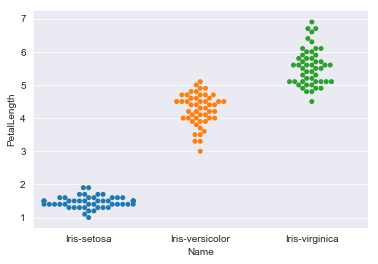

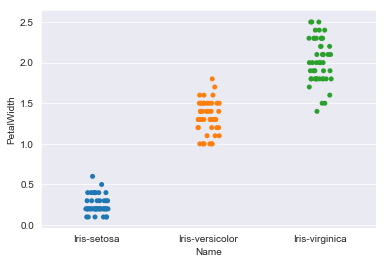

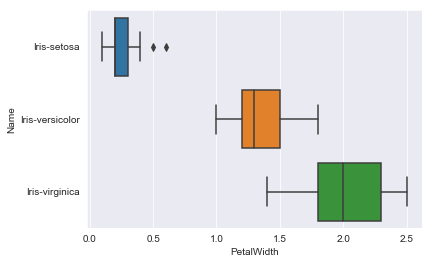

In [16]:
sns.swarmplot(x="Name",y="PetalLength",data=data)
plt.show()
sns.stripplot(x="Name",y="PetalWidth",data=data)
plt.show()
sns.boxplot(y="Name",x="PetalWidth",data=data)
plt.show()

In [6]:
data.corr()

,SepalLength,SepalWidth,PetalLength,PetalWidth
SepalLength,1.000000,-0.109369,0.871754,0.817954
SepalWidth,-0.109369,1.000000,-0.420516,-0.356544
PetalLength,0.871754,-0.420516,1.000000,0.962757
PetalWidth,0.817954,-0.356544,0.962757,1.000000


In [2]:
import math
def euclidean(data1,data2,length):
    
    #this function returns the euclidean distance between two rows
    #write your code from here
    dis=0
    for i in range(length):
        dis=dis+(pow((data1[i]-data2[i]),2))
    distance=math.sqrt(dis)
    return distance

In [3]:
#defining our KNN model
import operator
def KNN(train_set,test_instance,k):
    
    #make your knn model here
    #Hint:
    #step1 - store distances for each row in training set wrt test instance
    distances=[]
    length=len(test_instance)-1
    for i in range(len(train_set)):
        a=euclidean(test_instance,train_set[i],length)
        distances.append([training_set[i],a])
        
    #step2 - sort all the rows according to distances in ascending order
    distance.sort(key=lambda a:a[1], reverse=False)
    
    #step3 - take the first K sorted distences and append their id in a list
    neighbors=distances[:k]
    
    #step4 - use this list to count the no. of votes for each category
    votes={}
    for j in range(len(neighbors)):
        rep=neighbors[j][-1]
        if rep in votes:
            votes[rep]=votes[rep]+1
        else:
            votes[rep]=1
            
    #step5 - return the category with highest no. of votes and their corresponding K neighbours id
    sorted_votes=sorted(votes.iteritem(), key=operator.itemgetter(1), reverse=True)
    return sorted_votes[0][0]

In [9]:
test=[[2,5,6,7]]
testset=pd.DataFrame(test)

In [10]:
result , neigh = KNN(data,testset,5)
print(result)
print(neigh)

Iris-virginica
[114, 100, 136, 148, 121]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split


In [12]:
X = data.drop(["Name"],axis=1)
y=data["Name"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=2)

cls = KNeighborsClassifier(n_neighbors=11,weights='distance')
cls.fit(X_train,y_train)
prediction=cls.predict(X_test)




In [13]:
print(metrics.accuracy_score(prediction,y_test))
print(metrics.f1_score(prediction,y_test,average='macro'))
print(metrics.confusion_matrix(prediction,y_test))

0.9777777777777777
0.9761600681140911
[[17  0  0]
 [ 0 14  0]
 [ 0  1 13]]
